In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import math
import numpy.linalg
import pandas as pd
from scipy.linalg import svd
from scipy.spatial.distance import pdist, squareform

In [3]:
data = np.loadtxt('kernelpca.txt')
data.shape

(4002, 100)

# Kernel PCA

In [ ]:
def pca(X, n):
 
    zero_mean = (X - X.mean(axis=0))
    cov = np.cov(zero_mean, rowvar=False)
    
    _, eigen_values, eigen_vectors = svd(cov)
    

    reduced_data = eigen_vectors[:n].dot(zero_mean.T).T
 
    return reduced_data, eigen_vectors

In [ ]:
reduced_data, eigen_vectors = pca(data, n=2)

In [ ]:
plt.plot(reduced_data)

In [18]:
def kernel_pca(data, n=2, kernel='rbf', degree=3, var=0.1):
    if kernel == 'rbf':
        sq_dists = squareform(pdist(data, 'sqeuclidean'))
        K = np.exp((-1/(var) * sq_dists))
    elif kernel == 'linear':
        K = data.dot(data.T)

    N = K.shape[0]
    print(K.shape[0])
    one_n = np.ones((N, N)) / N
    
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    _, eigen_values, eigen_vectors = svd(K)
    
    return eigen_vectors[:1, :].T * np.sqrt(eigen_values[:1])

transformed = kernel_pca(data, kernel='rbf', var=0.05)

4002


No handles with labels found to put in legend.


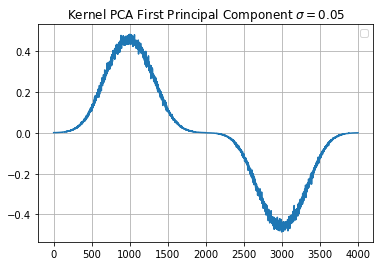

In [19]:
plt.plot(transformed)
plt.grid()
# plt.xlabel(r'$\epsilon$')
# plt.ylabel('time')
plt.title('Kernel PCA First Principal Component $\sigma=0.05$')
plt.legend()
plt.savefig('kernelPCA4.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()

# Kernel PCA + Power Method

In [8]:
###############power method##############
var=100
sq_dists = squareform(pdist(data, 'sqeuclidean'))
K = np.exp((-1/(var) * sq_dists))
N = K.shape[0]
one_n = np.ones((N, N)) / N

eigenvec = np.random.rand(N, 1)
# eigenval = eigenvalue(A, eigenvec)
one_n_dot_K = one_n.dot(K)
K_one_n_dot = K.dot(one_n)
for _ in range(1000):
    newEigenvec = K.dot(eigenvec) - one_n_dot_K.dot(eigenvec) - K_one_n_dot.dot(eigenvec) + one_n_dot_K.dot(one_n).dot(eigenvec)
    newEigenvec = newEigenvec/np.linalg.norm(newEigenvec)
    eigenvec = newEigenvec
    
    
eigenvec

array([[-0.02030713],
       [-0.01973906],
       [-0.01990124],
       ...,
       [ 0.01995725],
       [ 0.02005149],
       [ 0.02009859]])